# Create fake user data

This notebook generates fake user data with long-tail distributions.

In [185]:
!pip install faker
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
DATA_DIR="../../data/recommendations/"
ratings_path = 'ml-latest-small/ratings.csv'
users_path = 'ml-latest-small/users.csv'
ratings_df = pd.read_csv(os.path.join(DATA_DIR, ratings_path))

In [187]:
users_df = ratings_df[['userId']].drop_duplicates().reset_index(drop=True)
users_df.head()

,userId
0,1
1,2
2,3
3,4
4,5


In [188]:
# Generate a long-tail probability distribution
def make_probability_distribution(size):
    probability_distribution = np.random.exponential(scale=1, size=size)
    probability_distribution.sort()
    probability_distribution = probability_distribution / probability_distribution.sum()
    return probability_distribution

sum 0.9999999999999999
mean 0.0016393442622950817
max 0.013202937384840215
min 1.6832808582512512e-07


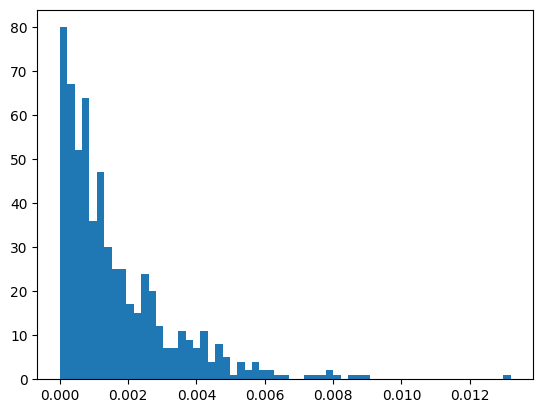

In [189]:
probability_distribution = make_probability_distribution(users_df.size)
print("sum", probability_distribution.sum())
print("mean", probability_distribution.mean())
print("max", probability_distribution.max())
print("min", probability_distribution.min())
# Plot the data to visualize the skew
plt.hist(probability_distribution, bins=int(users_df.size/10))
plt.show()

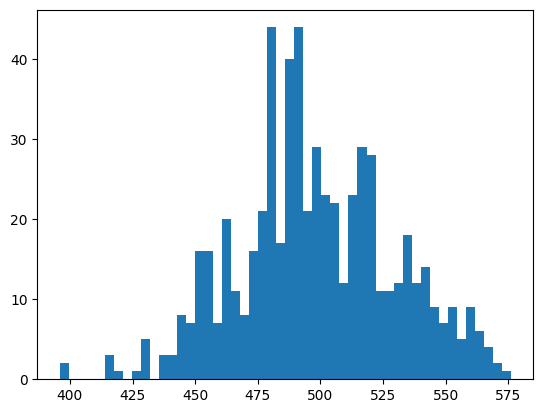

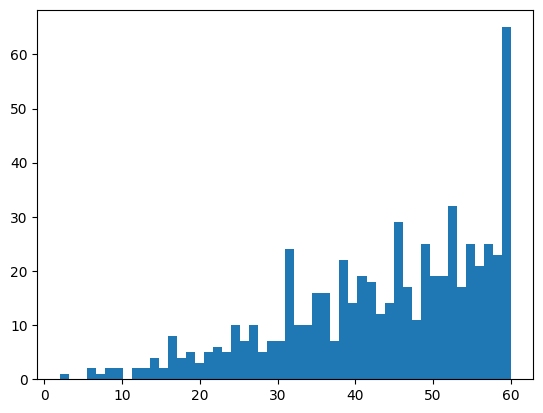

,userId,city,post_code,job,downloads,contract_months
510,511,Alanport,58083,TEFL teacher,396,46
567,568,Cochranburgh,62487,TEFL teacher,396,56
148,149,New Maria,89189,IT technical support officer,416,43
274,275,Beasleymouth,14946,TEFL teacher,416,12
406,407,Lake Melaniebury,83022,TEFL teacher,416,30
...,...,...,...,...,...,...
207,208,Lake Sabrinaport,44858,"Surveyor, planning and development",567,47
513,514,Bullockstad,73763,Surgeon,568,48
180,181,West Kennethfurt,95603,Stage manager,570,8
396,397,Ericatown,66984,Structural engineer,570,50


In [194]:
from faker import Faker

fake = Faker()
NUM_USERS = users_df['userId'].count()

cities = np.array([fake.city() for _ in range(0, int(users_df.size / 5))])
post_codes = {city: [fake.unique.postcode() for _ in range(0, 11)] for city in cities}
jobs = [fake.job() for _ in range(0, int(users_df.size / 5))]

cities_dist = make_probability_distribution(len(cities))
jobs_dist = make_probability_distribution(len(jobs))
contract_dist = make_probability_distribution(61)

users_df['city'] = np.random.choice(cities, size=NUM_USERS, p=cities_dist)
#post codes should be a common pool for each city
users_df['post_code'] = [np.random.choice(post_codes[city]) for city in users_df['city']]
users_df['job'] = np.random.choice(jobs, size=NUM_USERS, p=jobs_dist)
#downloads is loosly associated with the job to get some correlations in the data
users_df['downloads'] = users_df['job'].apply(lambda x: int(np.random.choice(jobs_dist[ord(x[0])-10:ord(x[0])+10]) * 1234567 + ord(x[1]) * 3))
users_df['contract_months'] = np.random.choice(range(0, 61), size=NUM_USERS, p=contract_dist)

plt.hist(users_df['downloads'], bins=50)
plt.show()
plt.hist(users_df['contract_months'], bins=50)
plt.show()

users_df.sort_values(by=['downloads', 'job'])

In [191]:
users_df.describe()

,userId,downloads,contract_months
count,610.000000,610.000000,610.000000
mean,305.500000,9571.313115,33.067213
std,176.236111,1919.741402,18.398715
min,1.000000,5367.000000,0.000000
25%,153.250000,8182.000000,20.000000
50%,305.500000,9446.500000,36.000000
75%,457.750000,10799.500000,50.000000
max,610.000000,14534.000000,60.000000
